# <font size="5">Importing the libraries</font>

In [24]:
import sys
import os
import numpy as np
import joblib
import warnings
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# <font size="5">Dataset and it's details</font>

In [25]:
df=pd.read_csv("E:/Internship/Personalized_Healthcare_System/notebooks/data/Medicine__data.csv")
df.head()

,Gender,Symptom,Causes,Disease,Medicine
0,Male,Fever,Viral Infection,Common Cold,Ibuprofen
1,Female,Headache,Stress,Migraine,Sumatriptan
2,Male,Shortness of Breath,Pollution,Asthma,Albuterol Inhaler
3,Female,Nausea,Food Poisoning,Gastroenteritis,Oral Rehydration
4,Male,Sore Throat,Bacterial Infection,Strep Throat,Penicillin


In [26]:
df.describe()

,Gender,Symptom,Causes,Disease,Medicine
count,241,241,241,241,241
unique,2,18,58,64,40
top,Female,Fatigue,Food Poisoning,Gastroenteritis,Rest
freq,125,30,20,20,47


In [27]:
df.shape

(241, 5)

In [28]:
df.columns

Index(['Gender', 'Symptom', 'Causes', 'Disease', 'Medicine'], dtype='object')

In [29]:
for c in df.columns[2:9]:
    print(c,df[c].unique())
    print("-"*50)

Causes ['Viral Infection' 'Stress' 'Pollution' 'Food Poisoning'
 'Bacterial Infection' 'Rheumatoid Arthritis' 'High Blood Pressure'
 'Allergies' 'Poor Diet' 'Depression' 'Cold Weather' 'Motion Sickness'
 'Smoking' 'Migraine Triggers' 'Spicy Food' 'Autoimmune Response'
 'Herniated Disc' 'Pregnancy' 'Anemia' 'Obesity' 'Osteoarthritis'
 'Dehydration' 'Tension' 'vereating            ' 'Menstrual Cycle'
 'Heart Disease' 'Hypothyroidism' 'Infection' 'COVID-19 Exposure'
 'Overexertion' 'Eye Strain' 'Sciatica' 'Chronic Fatigue Syndrome'
 'Physical Exertion' 'COVID-19 exposure' 'Overeating' 'tCOVID-19 exposure'
 'Chronic Fatigue' ' COVID-19 Exposure' 'Chronic FatigueSyndrome'
 'Bacterial Infection ' 'Anemia              ' 'Stress              '
 'Obesity             ' 'Allergies           ' 'Viral Infection     '
 'Rheumatoid Arthritis ' 'Dehydration         ' 'Tension             '
 'Overeating          ' 'Menstrual Cycle    ' 'Heart Disease       '
 'Hypothyroidism      ' 'Infection          

In [30]:
df['Causes'].unique()

array(['Viral Infection', 'Stress', 'Pollution', 'Food Poisoning',
       'Bacterial Infection', 'Rheumatoid Arthritis',
       'High Blood Pressure', 'Allergies', 'Poor Diet', 'Depression',
       'Cold Weather', 'Motion Sickness', 'Smoking', 'Migraine Triggers',
       'Spicy Food', 'Autoimmune Response', 'Herniated Disc', 'Pregnancy',
       'Anemia', 'Obesity', 'Osteoarthritis', 'Dehydration', 'Tension',
       'vereating            ', 'Menstrual Cycle', 'Heart Disease',
       'Hypothyroidism', 'Infection', 'COVID-19 Exposure', 'Overexertion',
       'Eye Strain', 'Sciatica', 'Chronic Fatigue Syndrome',
       'Physical Exertion', 'COVID-19 exposure', 'Overeating',
       'tCOVID-19 exposure', 'Chronic Fatigue', ' COVID-19 Exposure',
       'Chronic FatigueSyndrome', 'Bacterial Infection ',
       'Anemia              ', 'Stress              ',
       'Obesity             ', 'Allergies           ',
       'Viral Infection     ', 'Rheumatoid Arthritis ',
       'Dehydration        

In [31]:
df['Disease'].unique()

array(['Common Cold', 'Migraine', 'Asthma', 'Gastroenteritis',
       'Strep Throat', 'Arthritis', 'Hypertension', 'Allergic Reaction',
       'Indigestion', 'Major Depressive', 'Influenza', 'Motion Sickness',
       'Chronic Bronchitis', 'Gastritis', 'Rheumatoid Arthritis',
       'Tonsillitis', 'Sciatica', 'Morning Sickness', 'Iron Deficiency',
       'Panic Disorder', 'Sleep Apnea', 'Dermatitis',
       'Respiratory infection', 'Heat Exhaustion', 'Tension Headache',
       'Menstrual Cramps', 'Coronary ArteryDisease', 'Thyroid Disorder',
       'Pneumonia', 'COVID-19', 'Muscle Strain', 'Vision Fatigue',
       'Herniated Disc', 'Chronic Fatigue Syndrome', 'Anxiety Disorder',
       'Muscle Overuse', 's  Arthritis', 'Major Depressive Disorder',
       'Allergic Reacti', 'Chronic Fatigue', ' Arthritis',
       'RespiratoryInfection', 'Coronary Artery', 'is  Arthritis',
       'Respiratory Infection', 'Coronary Artery Disease', 'Respiratory',
       'Strep Throat     ', 'Iron Deficienc

In [32]:
df.isna().sum()

Gender      0
Symptom     0
Causes      0
Disease     0
Medicine    0
dtype: int64

In [33]:
c_count = df['Causes'].value_counts().reset_index() 
c_count.columns = ['Causes','Cause Count'] 
c_count

,Causes,Cause Count
0,Food Poisoning,20
1,Viral Infection,17
2,Stress,15
3,Allergies,15
4,Rheumatoid Arthritis,14
5,Chronic Fatigue Syndrome,13
6,Infection,12
7,Motion Sickness,11
8,Physical Exertion,10
9,Overexertion,9


# <font size="5">Count Frequency Visualization</font>
## <font size="3">1. Frequency of Each Cause</font>

C:\Users\DELL\AppData\Local\Temp\ipykernel_18560\917905761.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Causes", order=df["Causes"].value_counts().index, palette="Set2")


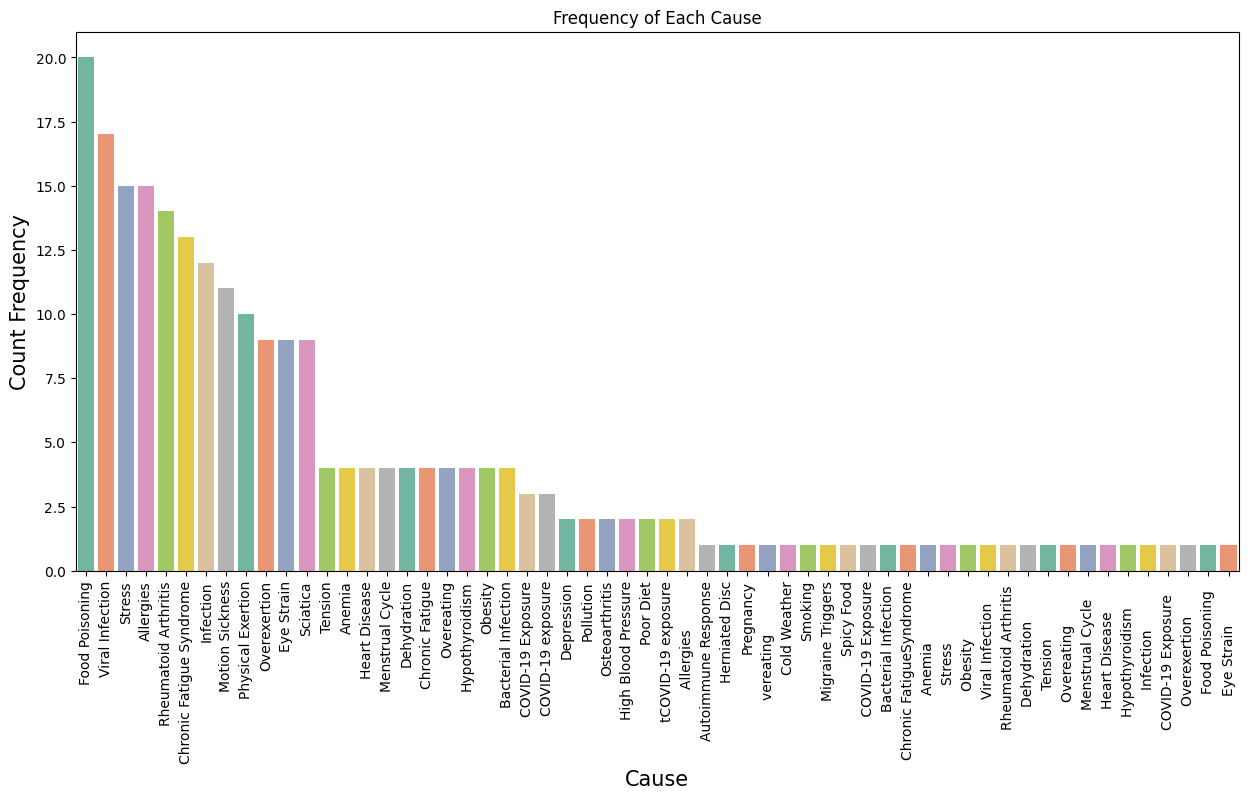

In [34]:
plt.figure(figsize=(15, 7))
sns.countplot(data=df, x="Causes", order=df["Causes"].value_counts().index, palette="Set2")
plt.xticks(rotation=90)
plt.title("Frequency of Each Cause")
plt.xlabel("Cause",fontsize=15)
plt.ylabel("Count Frequency",fontsize=15)
plt.show()


# <font size="5">Count Frequency Visualization</font>
## <font size="3">2. Frequency of Each Disease</font>

C:\Users\DELL\AppData\Local\Temp\ipykernel_18560\478882812.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=df["Disease"], order=df["Disease"].value_counts().index,palette='viridis')


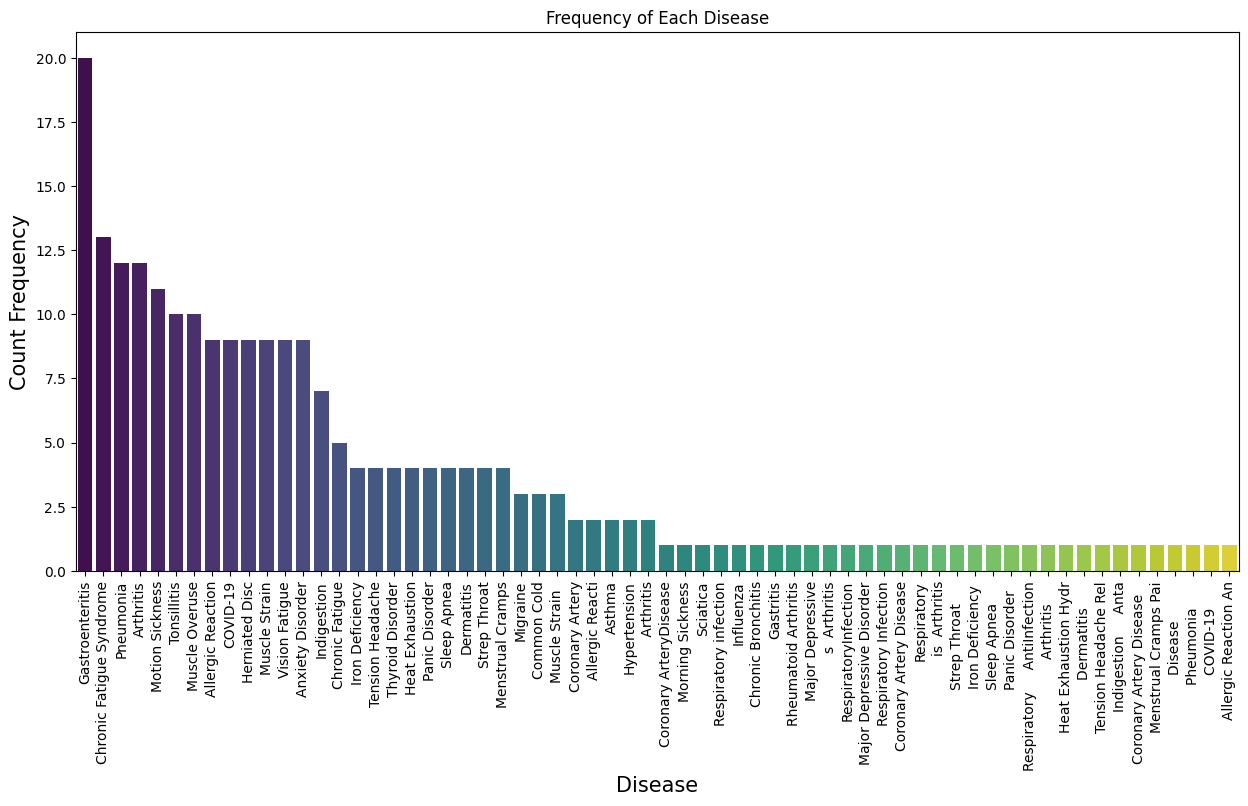

In [35]:
plt.figure(figsize=(15, 7))
sns.countplot(data=df, x=df["Disease"], order=df["Disease"].value_counts().index,palette='viridis')
plt.xticks(rotation=90)
plt.title("Frequency of Each Disease")
plt.xlabel("Disease",fontsize=15)
plt.ylabel("Count Frequency",fontsize=15)
plt.show()


# <font size="5">Label Encoding the Columns</font>
## <font size='3'>Encoding the Priority Values from Categorical value to Numerical Value</font>


In [41]:
label_cols = ['Symptom', 'Causes', 'Disease','Gender','Medicine']
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Gender    241 non-null    int64
 1   Symptom   241 non-null    int64
 2   Causes    241 non-null    int64
 3   Disease   241 non-null    int64
 4   Medicine  241 non-null    int64
dtypes: int64(5)
memory usage: 9.5 KB


# <font size="5">Train-Test Splitting</font>


In [43]:
x=df.drop(labels='Medicine', axis=1)
y=df["Medicine"]


In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [45]:
type(x_train)

pandas.core.frame.DataFrame

In [46]:
type(y_test)

pandas.core.series.Series

# <font size="5">Implementing the Models</font>
# <font size="4">1. KNN Classifier</font>
<font size="3">KNN Classifier used to classify data based on the majority label of its nearest neighbors.</font>



In [47]:
knn=KNeighborsClassifier(n_neighbors=3)

In [48]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

# <font size="3.5">Numerical Prediction (Testing) for K-Nearest Neighbors Classifier.</font>


In [49]:
pred_knn=knn.predict(x_test)
pred_knn

array([ 6,  2, 25,  5, 19, 28, 12, 28, 15, 31, 10, 19,  8, 28, 24, 24, 27,
       16, 12, 28, 19, 28, 28, 22,  6, 12, 30, 10,  8, 24, 12, 28,  1,  4,
       20, 12,  1, 28,  8, 28,  4, 28, 28, 25,  5, 24,  6, 12, 25])

In [50]:
pred_knn.reshape(-1,1)

array([[ 6],
       [ 2],
       [25],
       [ 5],
       [19],
       [28],
       [12],
       [28],
       [15],
       [31],
       [10],
       [19],
       [ 8],
       [28],
       [24],
       [24],
       [27],
       [16],
       [12],
       [28],
       [19],
       [28],
       [28],
       [22],
       [ 6],
       [12],
       [30],
       [10],
       [ 8],
       [24],
       [12],
       [28],
       [ 1],
       [ 4],
       [20],
       [12],
       [ 1],
       [28],
       [ 8],
       [28],
       [ 4],
       [28],
       [28],
       [25],
       [ 5],
       [24],
       [ 6],
       [12],
       [25]])

In [51]:
import pickle

with open('med_knn_model.pkl','wb') as f:
    pickle.dump(knn,f)

In [52]:
import pickle
with open('med_knn_model.pkl', 'rb') as f:
    obj = pickle.load(f)
    print(type(obj))

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>


In [53]:
decoded_m1 = label_encoders['Medicine'].inverse_transform(pred_knn)

decoded_m1

array(['Antivirals', 'Amlodipine', 'Penicillin', 'Antihistamine',
       'Isolation', 'Rest', 'Fluids', 'Rest', 'Hydration', 'Therapy',
       'Dimenhydrinate', 'Isolation', 'CPAP Machine', 'Rest',
       'Pain Relievers', 'Pain Relievers', 'Relaxation', 'Ibuprofen',
       'Fluids', 'Rest', 'Isolation', 'Rest', 'Rest', 'Nitroglycerin',
       'Antivirals', 'Fluids', 'Sumatriptan', 'Dimenhydrinate',
       'CPAP Machine', 'Pain Relievers', 'Fluids', 'Rest',
       'Albuterol Inhaler', 'Antibiotics', 'Levothyroxine', 'Fluids',
       'Albuterol Inhaler', 'Rest', 'CPAP Machine', 'Rest', 'Antibiotics',
       'Rest', 'Rest', 'Penicillin', 'Antihistamine', 'Pain Relievers',
       'Antivirals', 'Fluids', 'Penicillin'], dtype=object)

In [54]:

# --- Step 7: Optionally decode actual values too (for comparison) ---
true_m1 = label_encoders['Medicine'].inverse_transform(y_test)

true_m1

array(['Antivirals', 'Amlodipine', 'Penicillin', 'Antihistamine',
       'Isolation', 'Rest', 'Fluids', 'Rest', 'Sertraline', 'Therapy',
       'Dimenhydrinate', 'Isolation', 'CPAP Machine', 'Rest',
       'Pain Relievers', 'Pain Relievers', 'Relaxation', 'Antacids',
       'Fluids', 'Rest', 'Isolation', 'Ginger', 'Rest', 'Nitroglycerin',
       'Antivirals', 'Fluids', 'Acetaminophen', 'Dimenhydrinate',
       'CPAP Machine', 'Pain Relievers', 'Fluids', 'Rest',
       'Pain Relievers', 'Antibiotics', 'Pain Relievers', 'Fluids',
       'Pain Relievers', 'Rest', 'CPAP Machine', 'Rest', 'Antibiotics',
       'Rest', 'Rest', 'NSAIDs', 'Antihistamine', 'Pain Relievers',
       'virals', 'Fluids', 'Penicillin'], dtype=object)

In [55]:
# --- Step 8: View results ---
results_df = pd.DataFrame({
    'Predicted Medicine 1': decoded_m1,
    'Actual Medicine 1': true_m1,
})


In [56]:
results_df

,Predicted Medicine 1,Actual Medicine 1
0,Antivirals,Antivirals
1,Amlodipine,Amlodipine
2,Penicillin,Penicillin
3,Antihistamine,Antihistamine
4,Isolation,Isolation
5,Rest,Rest
6,Fluids,Fluids
7,Rest,Rest
8,Hydration,Sertraline
9,Therapy,Therapy


## <font size="4">Evaluating Accuracy for K-Nearest Neighbor Classifier</font>


In [57]:
acc_m1 = accuracy_score(y_test, pred_knn)
print(f"Accuracy for Medicine - KNN: {acc_m1 * 100:.2f}%")

Accuracy for Medicine - KNN: 81.63%


# <font size="4">Note:</font>
<font size="3">This model achieves an accuracy score of 81.63% for Medicine, indicating that it is perfoming well.</font>

# <font size="5">Implementing the Models</font>
# <font size="4">2. Random Forest Classifier</font>
<font size="3">A Random Forest is like a group of decision trees working together to make a decision.</font>



In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf_mdl=RandomForestClassifier(n_estimators=100)

In [60]:
rf_mdl.fit(x_train,y_train)

RandomForestClassifier()

# <font size="3.5">Numerical Prediction (Testing) for Random Forest Classifier</font>


In [61]:
rf_pred=rf_mdl.predict(x_test)
rf_pred

array([ 6,  2, 25,  5, 19, 28, 12, 28, 29, 31, 10, 19,  8, 28, 24, 24, 27,
       17, 12, 28, 19, 10, 28, 22,  6, 12, 16, 10,  8, 24, 12, 28, 21,  4,
       20, 12, 21, 28,  8, 28,  4, 28, 28, 18,  5, 24,  6, 12, 25])

In [62]:
decoded_m1_rf = label_encoders['Medicine'].inverse_transform(rf_pred)

In [63]:
true_m1_rf = label_encoders['Medicine'].inverse_transform(y_test)

In [64]:
rf_results_df = pd.DataFrame({
    'Predicted Medicine': decoded_m1_rf,
    'Actual Medicine': true_m1_rf
    })
rf_results_df

,Predicted Medicine,Actual Medicine
0,Antivirals,Antivirals
1,Amlodipine,Amlodipine
2,Penicillin,Penicillin
3,Antihistamine,Antihistamine
4,Isolation,Isolation
5,Rest,Rest
6,Fluids,Fluids
7,Rest,Rest
8,Sertraline,Sertraline
9,Therapy,Therapy


## <font size="4">Evaluating Accuracy for Random Forest Classifier</font>


In [65]:
acc_m_rf = accuracy_score(y_test, rf_pred)
print(f"Accuracy for Medicine - Random Forest: {acc_m_rf * 100:.2f}%")

Accuracy for Medicine - Random Forest: 83.67%


# <font size="4">Note:</font>
<font size="3">This model achieves an accuracy score of 83.67% for Medicine 1 and 91.84% for Medicine 2, indicating that it is perfoming well.</font>

In [66]:
with open ('le_medicine.pkl','wb') as f:
    pickle.dump(label_encoders,f)